In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import opendatasets as od
from PIL import Image
import pandas as pd

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [2]:
od.download("https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  gonzajl


Your Kaggle Key:

  ········


100%|██████████| 1.52G/1.52G [00:18<00:00, 86.4MB/s]


In [3]:
od.download("https://www.kaggle.com/datasets/mohammedrizwanmalik/kidney-stones-mri-and-ct-scans")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  gonzajl


Your Kaggle Key:

  ········


100%|██████████| 682M/682M [00:09<00:00, 72.3MB/s] 


In [4]:
od.download("https://www.kaggle.com/datasets/raagbhutani/kidneystone")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  gonzajl


Your Kaggle Key:

  ········


100%|██████████| 611M/611M [00:13<00:00, 48.1MB/s] 


In [11]:
od.download("https://www.kaggle.com/datasets/arjunbasandrai/medical-scan-classification-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  gonzajl


Your Kaggle Key:

  ········


100%|██████████| 15.0G/15.0G [03:36<00:00, 74.6MB/s]


In [10]:
!mkdir dataset
!mkdir dataset/cyst
!mkdir dataset/stone
!mkdir dataset/tumor
!mkdir dataset/normal

!mv ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/* dataset/cyst
!mv ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/* dataset/stone
!mv ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/* dataset/tumor
!mv ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/* dataset/normal

!mv kidney-stones-mri-and-ct-scans/Dataset/Test/Kidney_stone/* dataset/stone
!mv kidney-stones-mri-and-ct-scans/Dataset/Test/Normal/* dataset/normal

!mv kidney-stones-mri-and-ct-scans/Dataset/Train/Kidney_stone/* dataset/stone
!mv kidney-stones-mri-and-ct-scans/Dataset/Train/Normal/* dataset/normal

!mv kidneystone/CT_SCAN/Kidney_stone/* dataset/stone
!mv kidneystone/CT_SCAN/Normal/* dataset/normal

!mv medical-scan-classification-dataset/'Kidney Cancer'/'Kidney Cancer'/Tumor/* dataset/tumor

In [19]:
print(len(os.listdir("dataset/cyst")))
print(len(os.listdir("dataset/normal")))
print(len(os.listdir("dataset/stone")))
print(len(os.listdir("dataset/tumor")))

3709
6914
2939
7283


In [21]:
def agregar_filas(filas, ruta_carpeta, etiquetas):
    for archivo in os.listdir(ruta_carpeta):
        if es_imagen(archivo):
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            fila = {"imagen": ruta_imagen, 
                    "cyst": etiquetas[0], 
                    "stone": etiquetas[1],
                    "tumor": etiquetas[2],
                    "normal": etiquetas[3]
                   }
            filas.append(fila)

In [74]:
filas = []
agregar_filas(filas, "dataset/cyst", [1, 0, 0, 0])
agregar_filas(filas, "dataset/stone", [0, 1, 0, 0])
agregar_filas(filas, "dataset/tumor", [0, 0, 1, 0])
agregar_filas(filas, "dataset/normal", [0, 0, 0, 1])

columnas = ["imagen", "cyst", "stone", "tumor", "normal"]

# Crea el DataFrame con las filas y nombres de columnas
df = pd.DataFrame(filas, columns=columnas)

In [29]:
def mostrar_grafico_clases(datos, categorias):
    
    cantidades = []
    
    for categoria in categorias:
        cantidades.append((datos[categoria] == 1).sum())

    plt.figure(figsize=(6, 4))
    barras = plt.bar(categorias, cantidades)

    for bar, cantidad in zip(barras, cantidades):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() / 2 - 550, str(cantidad), fontsize=12)

    plt.xlabel("Clases")
    plt.ylabel("Cantidad de Imágenes")
    plt.title("Cantidad de Imágenes por Clase")

    plt.show()

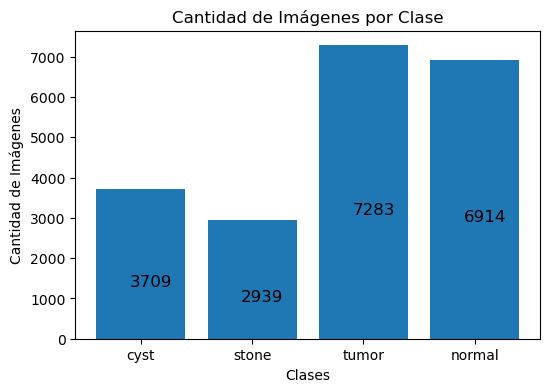

In [30]:
mostrar_grafico_clases(df, columnas[1:])

In [76]:
cant_imagenes = 2939

dataFrame = pd.DataFrame()

for i in range(1, 5):
    dataFrame = pd.concat([dataFrame, df.query(columnas[i] + "== 1")[:cant_imagenes]])
    
# Mezclar
dataFrame = dataFrame.sample(frac=1)

# Exporta el DataFrame en un archivo CSV
dataFrame.to_csv("./dataset/datos.csv", index=False)

In [54]:
df_eliminar = pd.DataFrame()

for i in range(1, 5):
    df_eliminar = pd.concat([df_eliminar, df.query(columnas[i] + "== 1")[cant_imagenes:]])
    
archivos_a_eliminar = df_eliminar["imagen"]

In [55]:
archivos_a_eliminar

2939         dataset/cyst/Cyst- (2517).jpg
2940         dataset/cyst/Cyst- (2033).jpg
2941         dataset/cyst/Cyst- (2230).jpg
2942         dataset/cyst/Cyst- (2041).jpg
2943         dataset/cyst/Cyst- (1433).jpg
                       ...                
20840     dataset/normal/Normal- (257).jpg
20841    dataset/normal/Normal- (1165).jpg
20842    dataset/normal/Normal- (2833).jpg
20843    dataset/normal/Normal- (3787).jpg
20844    dataset/normal/Normal- (3935).jpg
Name: imagen, Length: 9089, dtype: object

In [56]:
for archivo in archivos_a_eliminar:
    os.remove(archivo)

In [57]:
print(len(os.listdir("dataset/cyst")))
print(len(os.listdir("dataset/normal")))
print(len(os.listdir("dataset/stone")))
print(len(os.listdir("dataset/tumor")))

2939
2939
2939
2939


In [58]:
def es_imagen(archivo):
    return archivo.endswith(('.jpg', '.jpeg', '.png'))

In [72]:
def refinar_imagenes(ruta_carpeta, tamaño_imagenes, tipo):
    num_imagen = 0
    archivos = os.listdir(ruta_carpeta)
    for archivo in archivos:
        if es_imagen(archivo):

            # Leemos la imagen
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            imagen = cv2.imread(ruta_imagen)
            
            # Le cambiamos el tamaño
            imagen = cv2.resize(imagen, (tamaño_imagenes, tamaño_imagenes))
            imagen = imagen.reshape(tamaño_imagenes, tamaño_imagenes, 3)

            # Guardamos la imagen
            cv2.imwrite(ruta_imagen, imagen)
            
            # Renombramos la imagen
            os.rename(ruta_imagen, ruta_carpeta + "/kidney-" + tipo + "-" + "0" * (4 - len(str(num_imagen))) + str(num_imagen) + archivo[-4:])
            num_imagen += 1

In [73]:
refinar_imagenes("./dataset/cyst", 224, "cyst")
refinar_imagenes("./dataset/stone", 224, "stone")
refinar_imagenes("./dataset/tumor", 224, "tumor")
refinar_imagenes("./dataset/normal", 224, "normal")